<h1> <center> Gallagher Case Study - Product Type Prediction  </center> <h1>

## Case Study Abstract ##

<b>Situation</b> – This is a case study for Gallagher . At Gallagher, one of our biggest challenges is deciding which insurance products are right for our clients’ needs. Using data on Gallagher's clients, the goal of the case study is to build a model which will predict the type of products that the company should sell to a client and deploy this model so that the applications and systems can use it. The objective through this case study is to explore and identify an optimized model that can predict the product type which can then be utilized by the internal business unit to make informed decision.

<b>Task</b> – In this case study, we’re tasked to explore the client purchase history and client census datasets to build a model that can predict the product type. Hopefully, the outcome will offer actionable insights and enable the company to make informed decision on coverage/product selection for different customer segment with help of data analysis.

<b>Action</b> – There are two datasets (client_census_data.csv and client_purchase_history.csv) that contain client policy/coverage/premium history and the associated census data for each of those businesses, the census data contains business specific information like the number of employees, the annual payroll, the county where the business is being operated with the total population etc. Initially, we will conduct exploratory data analysis on the datasets – investigate the statistics of data, identify missing values on each data column, explore target variable distribution, correlation between predictor variables, identify columns that may not be necessary, and then preprocess data to convert categorical variables to numeric variables, remove columns that may be not be needed, impute missing values as needed. The preprocessed data will be scaled, trained using a baseline model and evaluated through K-Fold cross validation with basic parameter setting using all the features. We will conduct further experimentation by using different parameter settings, drop features of low importance and determine the optimized model with best accuracy score.

<b>Result</b> – The best model will be used to predict product type in the test dataset. Our scoring will be mainly based on accuracy and will try to evaluate using other metrics too. For each client in the test set, we will predict the product type. 

## Model Pipeline ##

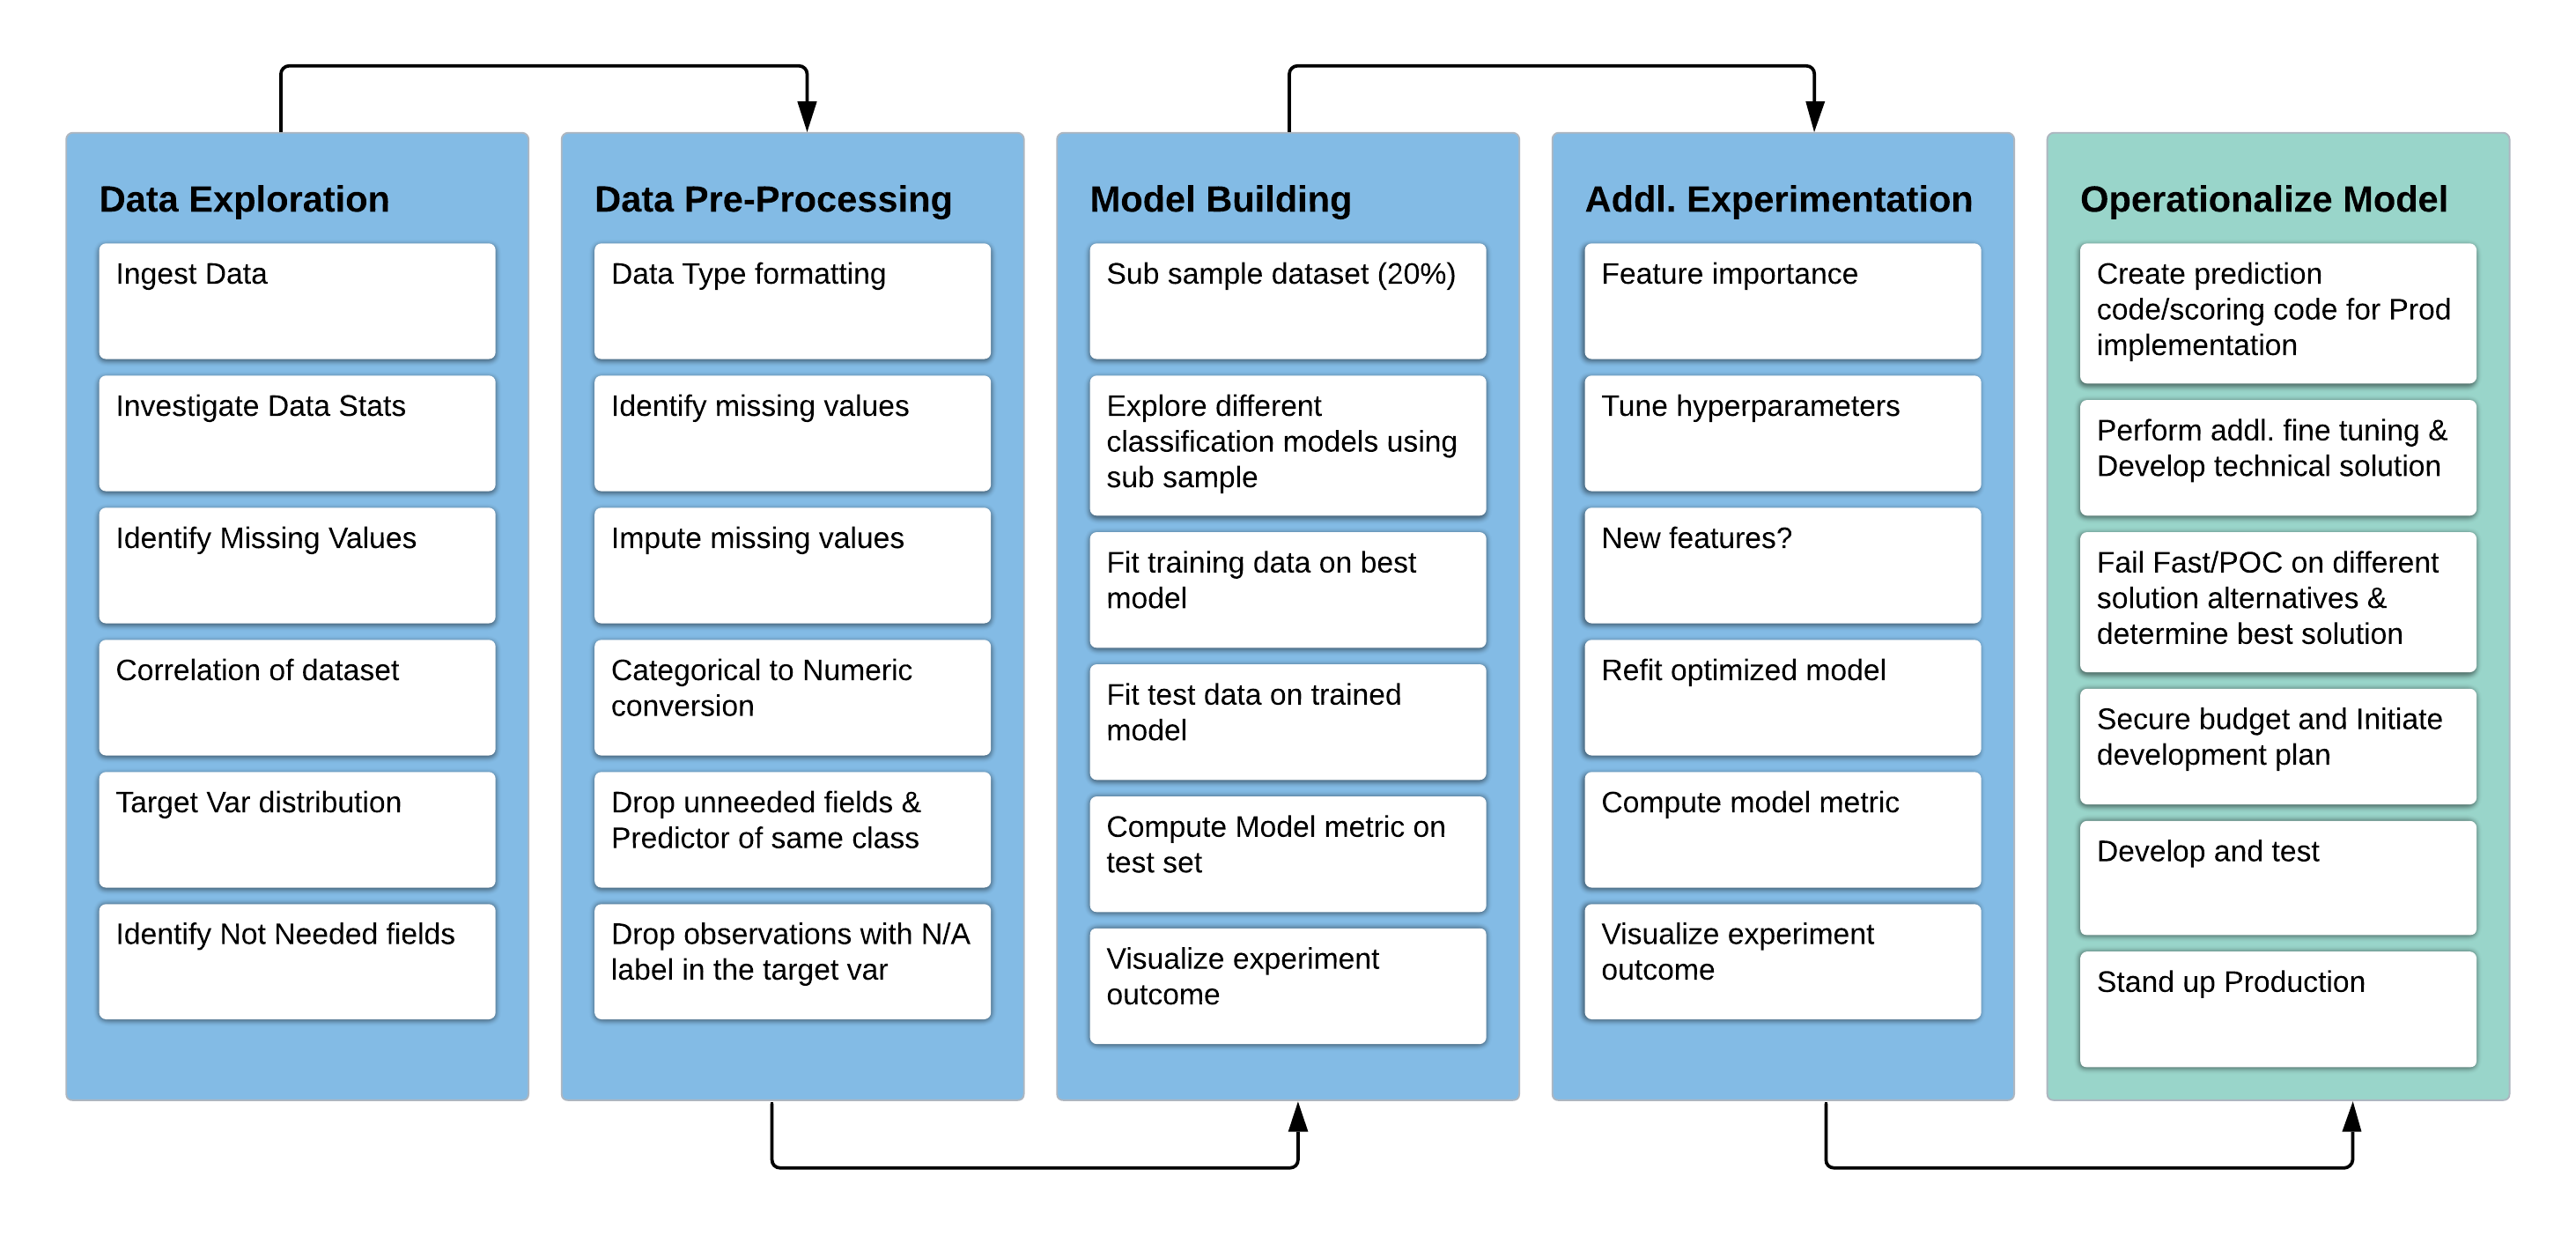

In [1]:
from IPython.display import Image
Image(filename='/users/kousik/ajg_case_study/model_pipeline.png')

## Problem Setting ##

Our objective was to predict the product type for different customers which appears to be a classification problem and we will explore different classification models for such a setting to predict the labels using a set of features given the basic assumption that the examples are independent and identically distributed. The problem seems to have only two classes (binary classification) and it is important to compare the performance of different machine learning algorithms consistently.

The client purchase history dataset contains 1314922 records and the client census data dataset contains 514976 records. Considering the size of the datasets, we will plan on evaluating different models using a stratified sub sample (20%) of the data and based on the outcome, we will train a model with the full dataset. We will perform cleaning and pre-processing of the data before training the model and the initial training/evaluation would be done using basic parameter setting and upon observing the outcome of this initial model, we will probably conduct further experimentation to tune the hyper-parameters if the required accuracy (> 80%) is not achieved through any of the models and if needed engineer additional features from the provided input data to improve the accuracy of the final model. 

## Metrics ##

The models will be basically scored on the accuracy. We will explore the following metrics on our trained model and calculate these metrics on the test set.

### Confusion Matrix ###

The confusion matrix is used to describe the performance of a classification model on a set of test data for which true values are known.

####  Please refer to confusion matrix image below

From the confusion matrix the following information can be extracted :


<b> True Positive (TP) </b>: This shows that a model correctly predicted Positive cases as Positive.

<b> False Positive (FP) </b>: This shows that a model incorrectly predicted Negative cases as Positive.

<b> False Negative (FN) </b>: This shows that an incorrectly model predicted Positive cases as Negative.

<b> True Negative (TN) </b>: This shows that a model correctly predicted Negative cases as Positive.

### F1-Score ###

This comes from the confusion matrix. Based on the above confusion matrix above, we can calculate the precision and the recall scores.

Precision score: this is the measure of the accuracy, provided that a class label has been predicted. Simply put, it answers the following question, of all the classes, how many were correctly predicted? The answer to this question should be as high as possible.

It can be calculated as follows:

#### Please refer to precision calculation image below ####

Recall score(Sensitivity): This is the true positive rate that is if it predicts positive then how often does this take place

####  Please refer to recall calculation image below

The F1 score is calculated based on the precision and recall of each class. It is the weighted average of the Precision and the recall scores. The F1 score reaches its perfect value at one and worst at 0.It is a very good way to show that a classifies has a good recall and precision values.

We can calculate it using this formula:

Please refer to the F1 score image attached

### Accuracy ###

#### Accuracy = (TP + TN)/Total Observations #### 

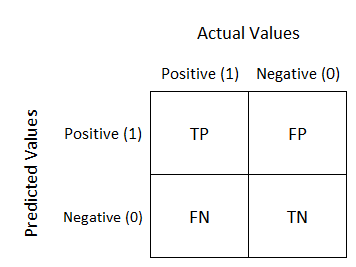

In [2]:
from IPython.display import Image
Image(filename='/users/kousik/ajg_case_study/cfm.png')

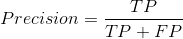

In [4]:
from IPython.display import Image
Image(filename='/users/kousik/ajg_case_study/prec.png')

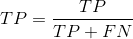

In [5]:
Image(filename='/users/kousik/ajg_case_study/rec.png')

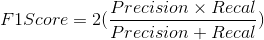

In [6]:
Image(filename='/users/kousik/ajg_case_study/f1.png')

### Observations from EDA ###

    1. Following are some of the important data metrics extracted from the dataset that are interesting to me.
        a. Total count in client purchase history  - 1314922
        b. Total count in client census dataset    - 514976
        c. Total count of missing Product_Group    - 27871
        d. Total count of missing Industry Segment - 607814
        e. Total count of missing Fee Revenue      - 1018400
        f. Total count of missing DUNS Number      - 606951
        g. Total count of missing Client Offices   - 614126      
        
    2. There are several NULL values in some of the predictor variables like Fee_Revenue, Client_Offices, DUNS_Number and the percentage of missing values ranges from 45-80%. I do not think these variables hold any statistical significance for our prediction problem and I am anyways planning to drop these variables and do not see any need to impute the missing values on these variables.
    
    3. The target variable (Product Group) has a very small percentage of missing values and we will drop those values from Model training and evaluation. I believe the missing values on the target variable requires manual involvement and input from the business area to include them in the supervised learning process. There is a potential for these missing values to turn into a new label which may force our problem to be updated to a multiclass classification problem. For now, we will ignore the missing values and proceed with the assumption that this is a binary classification problem.
    
    4. There are some variables with very strong positive and negative correlation which should technically be excluded from the model training (like for example, zip code & cnty population), I will drop some of them and leave the remaining to determine the importance of those features. There is a potential risk of overfitting but we should be able to re-train the model after observing the importance of those high correlation features.
    
    5. The numeric variables that are missing values and part of our feature space will be imputed to the mean value.
    
    6. Based on class frequency 80% of the observations have been classified as the "Primary" Product_Group which is significant observation. Will that mean most of the predictions would end up being classified as "Primary"? May be.
    
    7. City does not seem to be having a large effect on the Product_Group classification. The distribution is pretty much the same across all the cities. 
    
    8. Bivariate distribution was not so informative on how some of the numeric variables that I was interested in were distributed against the target variable.
    
    9. Market Type, Revenue Segmentation, Intermediary Market Type, Region may have effect on our final prediction. Majority of the observations fall under "Type-1" Market Type category, Central and South West regions have large number of observations and Segment-2 seems to have huge number of observations categorized under it.
    
    10. Product line distribution seems to be pretty much evenly distributed except for one specific category. Industry segment has several Unknown values and need to determine how this feature impacts the model with the unknown values.
    
    11. Some of the feature like the Client Key, Source_System_Name, census_match_id, Policy_ID etc. will be dropped because they have a very low significance or impact to our model and the problem we are trying to solve.
    
    12. In attempt to make use of annual payroll, population and number of employees, I will group them under logical buckets as new features and use those derived features in model training & evaluation.
    
    13. Industry segment appears in different shape and form in the dataset. There is sic_level_2, sic_level_2_name, sic_level_8, sic_level_8_name, management_niche, industrynicheconvention_desc, NAICSlevel1_Name, NAICSLevel1_Code. I dont think we would all these different levels of categorization and will choose only sic_level_8 and NAICSLevel1_Code for the model building and evaluation.
    
    14. The outlier records will be dropped because they are missing several features and may skew the model. The number of outlier records are minimal and I believe it should be ok to drop them.
    
    15. Features like zip code, effective year etc. are actually categorical values and need to be transformed using some kind of encoding but the risk is that these features have a very high cardinality. We will try using one hot encoding/label encoder for these features and observe the results.

## Data Pre-Processing and Feature Engineering ##

    1. Drop unneeded features 
    2. Semantic adjustments to features 
    3. Impute missing value for Payroll & Employee count with mean 
    4. Drop records with missing values 
    5. Convert features to string for Categorical Encoding 
    6. Create Sub Sample for Model Comparison 
    7. Model Comparison 


### Model Building and Cross Validation ###

<h3> Model Algorithms </h3>

Following are the different algorithms that we will explore in our project with different parameter setting. I am also looking to build home grown optimizers from the knowledge that we gathered in the course as part of future extension to this case study. We chose these classifiers because of the problem we are trying to solve is a binary classification problem and these classifiers are most widely used/recommended.

1. KNN Classifier
2. Gaussian NB
3. Random Forest Classifier
4. Decision Tree Classifier
5. LDA
6. SVC (Support Vector Machine)
7. Logistic Regression Classifier


## Feature Importance ##

#### Random Forest Classifier ###

#### Decision Tree Classifier ###

### Feature Importance Scores with frequency ###

Create a table with the feature importance scores and values with max occurrence for each of the features along with their frequencies and save to a database table. This table can be used as the reason code determination table and the prediction rationale can be developed from this table

### Save Model to Pickle file ###